In [1]:
import numpy as np
import pandas as pd

features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print("Number of features {}".format(len(features)))

x_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace = True, header = None, names = features)
x_train['Subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header =None, squeeze= True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

train = x_train
train['Activity'] = y_train
train['Activity_name'] = y_train_labels
train.sample()

Number of features 561


C:\Users\hp\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,Activity_name
6466,0.285795,-0.009203,-0.089718,-0.992759,-0.982785,-0.978808,-0.994373,-0.982999,-0.979355,-0.929811,...,-0.002347,-0.078469,0.796209,0.87867,-0.746632,0.260104,0.08606,28,5,STANDING


In [2]:
train.shape

(7352, 564)

In [3]:
x_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace = True, header = None, names = features)
x_test['Subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header =None, squeeze= True)

y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

test = x_test
test['Activity'] = y_test
test['Activity_name'] = y_test_labels
print(test.shape)
test.sample()

C:\Users\hp\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2947, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,Activity_name
867,0.3762,0.013778,-0.139821,0.195022,-0.249761,0.19482,0.113347,-0.290023,0.11506,0.645083,...,-0.567829,0.595133,0.875463,-0.472144,-0.839942,0.09085,0.134654,9,3,WALKING_DOWNSTAIRS


In [4]:
print(sum(train.duplicated()))
print(sum(test.duplicated()))

0
0


In [5]:
print(train.isnull().values.sum())
print(test.isnull().values.sum())

0
0


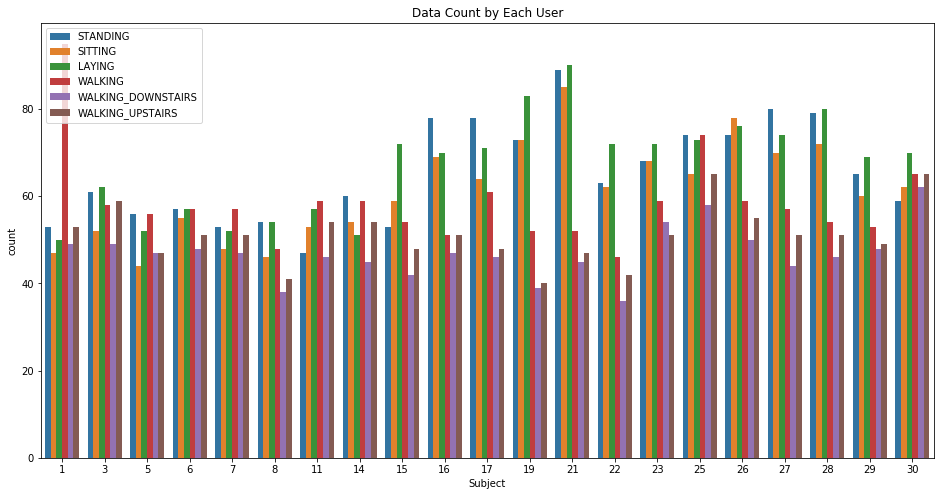

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.title('Data Count by Each User')
sns.countplot(x= 'Subject', hue = 'Activity_name', data= train)
plt.legend()
plt.show()

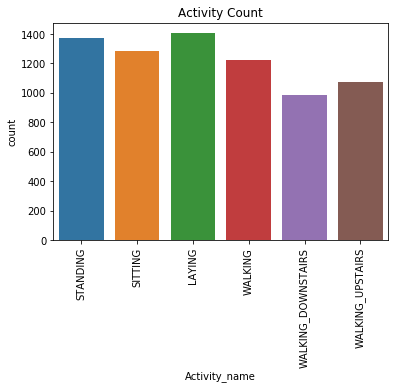

In [8]:
plt.title('Activity Count')
sns.countplot(train['Activity_name'])
plt.xticks(rotation=90)
plt.show()

In [9]:
features_names = train.columns
features_names = features_names.str.replace('[()]','')
features_names = features_names.str.replace('[-]','')
features_names = features_names.str.replace('[,]','')

train.columns = features_names
test.columns= features_names

print(train.columns)

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'Subject', 'Activity', 'Activity_name'],
      dtype='object', length=564)


In [10]:
train.to_csv('UCI_HAR_Dataset/csv_files2/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files2/test.csv', index=False)

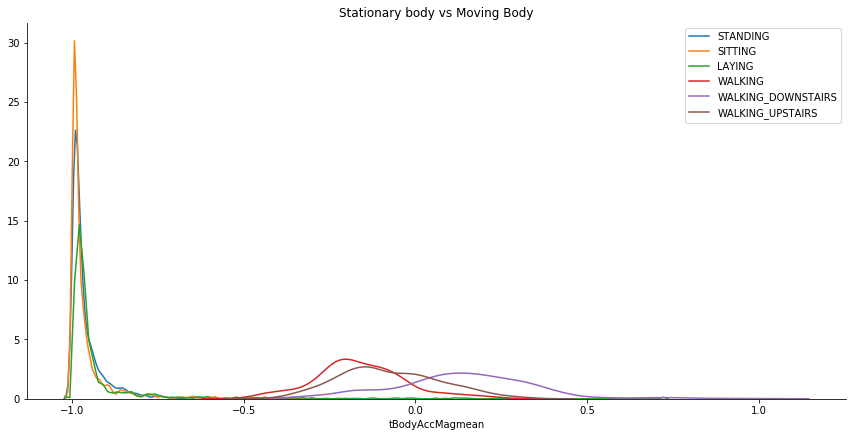

In [11]:
fg = sns.FacetGrid(train, hue = 'Activity_name', size=6,aspect=2)
fg.map(sns.distplot, 'tBodyAccMagmean', hist=False)
plt.legend()
plt.title("Stationary body vs Moving Body")
plt.show()

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=2, perplexity= 5)
x_pre_tsne = train.drop(['Subject', 'Activity', 'Activity_name'], axis=1)
y_pre_tsne = train['Activity_name']
data_tsne = tsne.fit_transform(x_pre_tsne)



[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.484s...
[t-SNE] Computed neighbors for 7352 samples in 46.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.156s
[t-SNE] Iteration 50: error = 113.7923737, gradient norm = 0.0224187 (50 iterations in 28.031s)
[t-SNE] Iteration 100: error = 97.2851715, gradient norm = 0.0195520 (50 iterations in 8.637s)
[t-SNE] Iteration 150: error = 92.9192734, gradient norm 

In [13]:
print(data_tsne)

[[6.3955177e+01 7.9159088e-02]
 [1.0395836e+01 3.5463184e+01]
 [1.2388262e+01 2.1675821e+01]
 ...
 [5.2383606e+01 8.1218376e+01]
 [5.2598446e+01 8.1163269e+01]
 [5.3961948e+01 8.2372963e+01]]


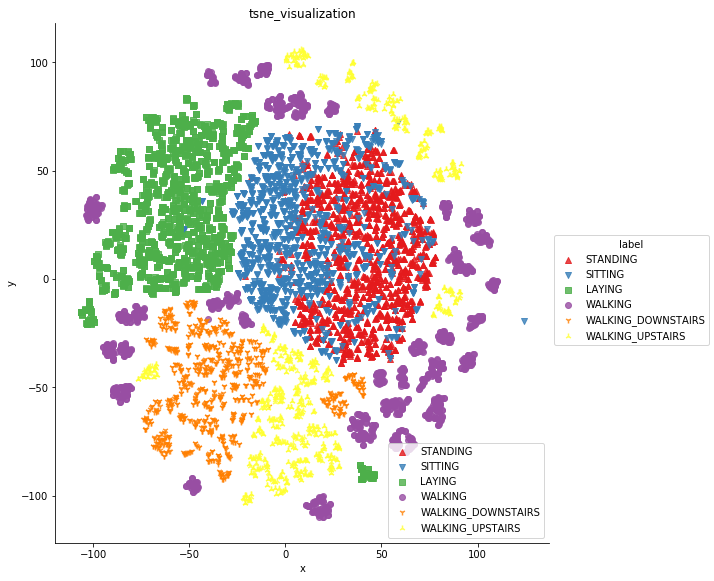

In [14]:
df = pd.DataFrame({'x':data_tsne[:,0], 'y':data_tsne[:,1] ,'label':y_pre_tsne})
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['^','v','s','o', '1','2'])
plt.legend()
plt.title('tsne_visualization')
plt.show()

In [15]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [16]:
import numpy as np
import pandas as pd

In [17]:
train = pd.read_csv('UCI_HAR_dataset/csv_files2/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files2/test.csv')

In [18]:
x_train = train.drop(['Subject', 'Activity', 'Activity_name'], axis=1)
y_train = train['Activity_name']

x_test = test.drop(['Subject', 'Activity', 'Activity_name'], axis=1)
y_test = test['Activity_name']

In [19]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [20]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def map_cm(cm, labels):
    plt.figure(figsize=(8,8))
    sns.heatmap(cm,annot= True,fmt ='d',cmap='cool', linewidth=5)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation =90)
    plt.title("Confusion Matrix")
    plt.show()

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

def any_model(model,x_train, y_train, x_test, y_test, labels):
    result = dict()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result['Prediction'] =y_pred
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    result['Accuracy'] = accuracy
    print('Accuracy = ',accuracy)
    
    cm =confusion_matrix(y_test, y_pred)
    result["ConfusionMatrix"]=cm
    print('Confusion Matrix \n',cm)
    cm_df = pd.DataFrame(cm,index=labels,columns=labels)
    map_cm(cm_df,labels)
    
    classification_report = metrics.classification_report(y_test, y_pred)
    result['ClassificationReport'] = classification_report
    print('Classification Report : \n',classification_report)
    
    result['Model'] = model
    
    print('\nBest Estimator : \n {}\n'.format(model.best_estimator_))
    
    print('\nParameters of best estimator : \n{}\n'.format(model.best_params_))
    
    print('\nTotal numbre of cross validation sets: \n{}\n'.format(model.n_splits_))
    
    print('\nAverage Cross Validate scores of best estimator : \n{}\n'.format(model.best_score_))

    return result

In [23]:
from sklearn.model_selection import GridSearchCV
def param_tuning(model, parameters):
    gscv=GridSearchCV(model, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

    return gscv

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.8min finished


Accuracy =  0.9630132337970818
Confusion Matrix 
 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


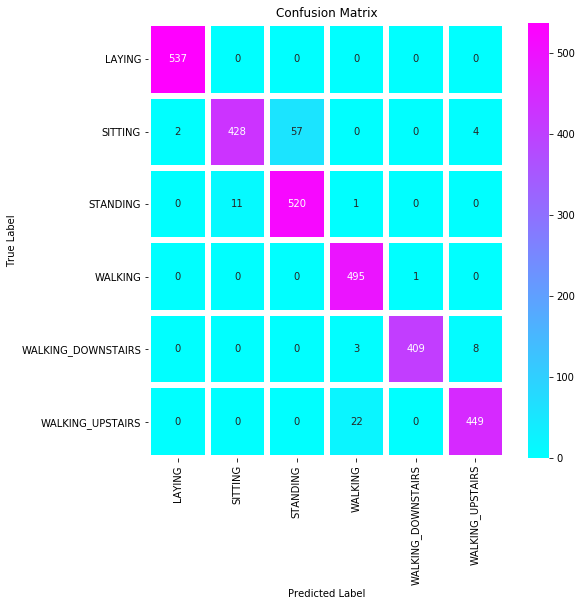

Classification Report : 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947

Best Estimator : 
 LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Parameters of best estimator : 
{'C': 30, 'penalty': 'l2'}
Total numbre of cross validation sets: 
3
Average Cross Validate scores of best estimator : 
0.9461371055495104


In [24]:
from sklearn import linear_model

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = param_tuning(log_reg, parameters)
log_reg_final = any_model(log_reg_grid,x_train, y_train, x_test, y_test, labels)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   36.1s finished


Accuracy =  0.9643705463182898
Confusion Matrix 
 [[537   0   0   0   0   0]
 [  2 418  66   0   0   5]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  14   1 456]]


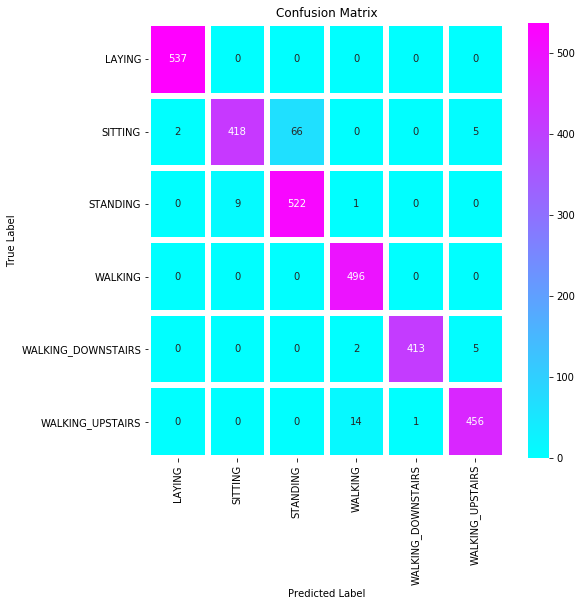

Classification Report : 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.85      0.91       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

       avg / total       0.97      0.96      0.96      2947


Best Estimator : 
 LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)


Parameters of best estimator : 
{'C': 2}


Total numbre of cross validation sets: 
3


Average Cross Validate scores of best estimator : 
0.9461371055495104



In [26]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = param_tuning(lr_svc, parameters)
lr_svc_final = any_model(lr_svc_grid,x_train, y_train, x_test, y_test, labels)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  6.0min finished


Accuracy =  0.9626739056667798
Confusion Matrix 
 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


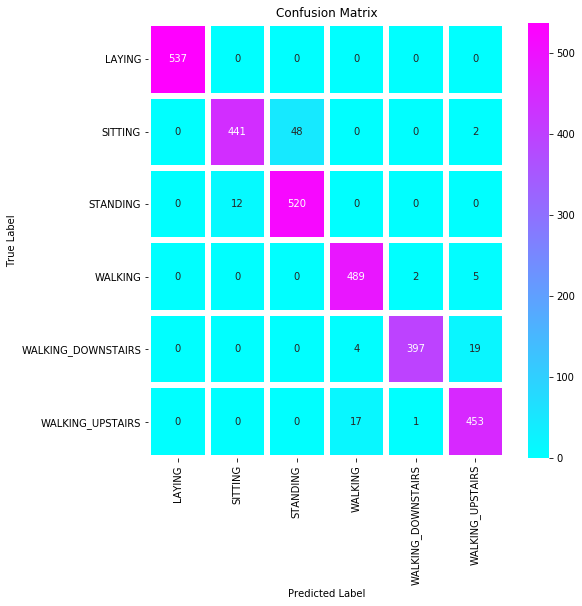

Classification Report : 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947


Best Estimator : 
 SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Parameters of best estimator : 
{'C': 16, 'gamma': 0.0078125}


Total numbre of cross validation sets: 
3


Average Cross Validate scores of best estimator : 
0.9440968443960827



In [29]:
from sklearn.svm import SVC

parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = param_tuning(rbf_svm, parameters)
rbf_svm_final = any_model(rbf_svm_grid,x_train, y_train, x_test, y_test, labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.7s finished


Accuracy =  0.8652867322701052
Confusion Matrix 
 [[537   0   0   0   0   0]
 [  0 387 104   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  15 343  62]
 [  0   0   0  68  29 374]]


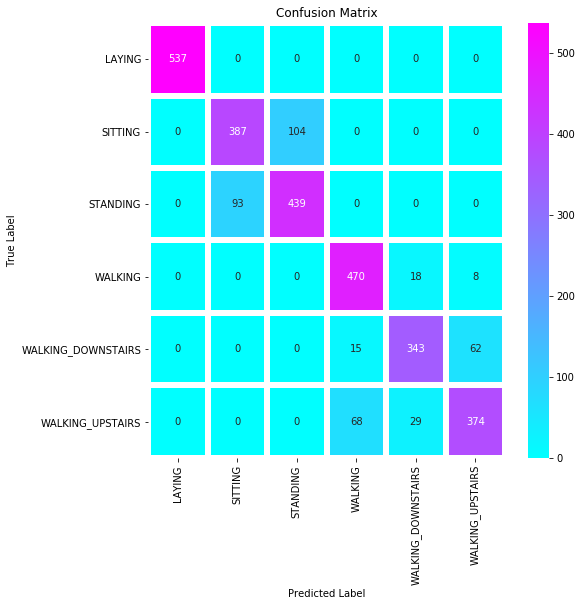

Classification Report : 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

       avg / total       0.87      0.87      0.86      2947


Best Estimator : 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Parameters of best estimator : 
{'max_depth': 7}


Total numbre of cross validation sets: 
3


Average Cross Validate scor

In [30]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = param_tuning(dt, parameters)
dt_final = any_model(dt_grid,x_train, y_train, x_test, y_test, labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.4s finished


Accuracy =  0.9002375296912114
Confusion Matrix 
 [[536   1   0   0   0   0]
 [  0 426  65   0   0   0]
 [  0  61 471   0   0   0]
 [  0   0   0 475   7  14]
 [  0   0   0  35 333  52]
 [  0   0   0  52   7 412]]


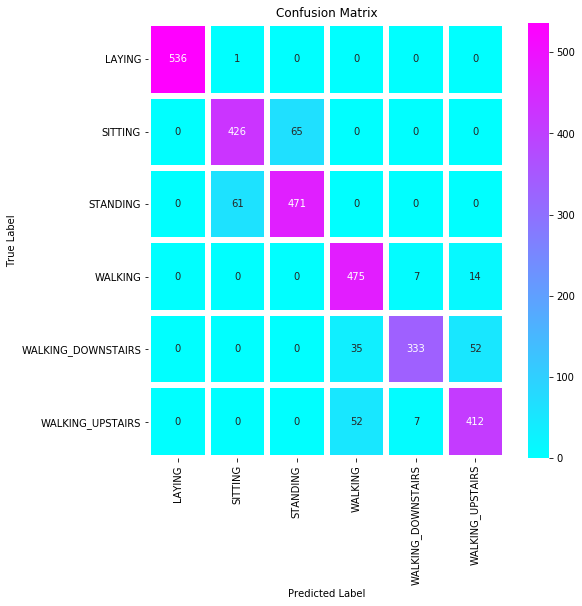

Classification Report : 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.87      0.87       491
          STANDING       0.88      0.89      0.88       532
           WALKING       0.85      0.96      0.90       496
WALKING_DOWNSTAIRS       0.96      0.79      0.87       420
  WALKING_UPSTAIRS       0.86      0.87      0.87       471

       avg / total       0.90      0.90      0.90      2947


Best Estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Parameters of best estimator : 
{'max_depth': 9}




In [32]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = param_tuning(rfc, parameters)
rfc_final = any_model(rfc_grid,x_train, y_train, x_test, y_test, labels)